## Notebook can be used for cropping tiff images... works for 13 bands

based on https://github.com/omdena/wfp/blob/master/task4_resnet/13bands/data_preprocessing-allbands.ipynb

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from PIL import Image
from matplotlib.pyplot import imshow
from pathlib import Path
from tqdm import tqdm
import numpy as np
from os import scandir, walk, listdir
from os.path import isfile, join
from skimage import io, transform
import os
import shutil
from matplotlib import pyplot

In [3]:
plt.rcParams['figure.figsize']=(8,8)

In [4]:
LAUNCH = True

In [11]:
# Cropping 13 bands images
MASKS_PROCESSING = False
path_source = '/home/jupyter/data/kansas_13bands/'
path_target = '/home/jupyter/data/kansas_13bands_cropped_by_min_dim/'

# Cropping masks
# MASKS_PROCESSING = True
# path_source = '/home/jupyter/data/kansas_masks_2016/'
# path_target = '/home/jupyter/data/kansas_masks_2016_cropped_by_min_dim/'

In [12]:
def open_allbands(path):
    return io.imread(str(path))

def center_crop_allbands(img, new_width=64, new_height=None):        

    
    height = img.shape[0]
    width = img.shape[1]

    if new_height is None:
        new_height = new_width

    left = int(np.ceil((width - new_width) / 2))
    right = width - int(np.floor((width - new_width) / 2))

    top = int(np.ceil((height - new_height) / 2))
    bottom = height - int(np.floor((height - new_height) / 2))
    
    #print(f'left {left}, right {right}, top {top}, bottom {bottom}')

   
    # for 13 bands images:
    if(MASKS_PROCESSING==False):
        center_cropped_img = img[top:bottom,left:right,:]
    else:
        # for 2D mask images
        center_cropped_img = img[top:bottom,left:right]
    
    
    assert((center_cropped_img.shape[0] == new_height) and (center_cropped_img.shape[1] == new_width))

    return center_cropped_img

def crop_on_img_allbands(filename, path_target, size=64):
    img = open_allbands(filename)
    
    print('Shape before:', img.shape)
    
    min_shape = img.shape[0] if img.shape[0]<img.shape[1] else img.shape[1]
    print('Min shape:', min_shape)
    
    img = center_crop_allbands(img, min_shape, min_shape)
    print(path_target+filename.stem+'.tif')
    
    #img.save(path_target+filename.stem+'.tif')
    np.save(path_target+filename.stem+'.npy', img)
    return img

In [13]:
# crop_on_img_allbands(Path('/home/jupyter/data/WFP_Nepal_13Bands_Scale10/wheat_Oct16_85-80621341_27-5942076_20161030T044922_img_2.tif'), 'test_redim.npy')

In [15]:
%%time

# now, i'm resizing dynamically every tif to max square shape by cropping to min rectangular dimension
# size = 64 #, 256, 500

# recreate the dir for given cropped format
if os.path.exists(path_target):
    shutil.rmtree(path_target)
os.makedirs(path_target)

i = 0

if LAUNCH:
    for r, d, f in walk(path_source):
        
        if r != path_source:
            break
        print(f'In directory {r}: {len(f)} files')
        for file in f:

            print(f'{i} working on img {path_source+file}')
            image = Path(path_source+file)    
            print(crop_on_img_allbands(image, path_target, size).shape)
            i = i + 1
            
print('processed {} files'.format(i))

## Check exemplary cropped images

In [13]:
# This function clips the RGB bands and maps the remaining values to the [0, 255] range
def visualize_all_bands(raw, bands=[3,2,1], min_map=0, max_map=2000, nmin=0, nmax=255):
    scale = (nmax-nmin) / (max_map-min_map)
    
 
    seg = raw[...,bands]
    
    seg = np.clip(seg, min_map, max_map)
    
    
    
    for i in range(seg.shape[-1]):
        print(f'Working on dim {i}')
        seg[..., i] = seg[..., i] * scale + nmin - min_map * scale
    
    
    return seg.astype(int)

/home/jupyter/data/kansas_13bands/tile_2400_9900.tif (942, 1203, 13) 24 MB
Working on dim 0
Working on dim 1
Working on dim 2


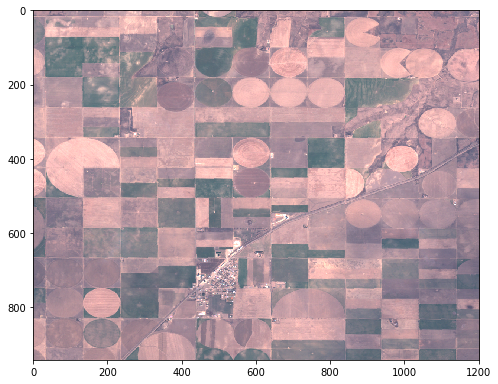

In [17]:
path_source = '/home/jupyter/data/kansas_13bands/'
filename = 'tile_2400_9900.tif'

raw = io.imread(path_source  + filename)

print(path_source + filename, raw.shape, round(os.path.getsize(path_source + filename)*1e-6), 'MB')

imshow(visualize_all_bands(raw))

/home/jupyter/data/kansas_13bands_cropped_by_min_dim/tile_2400_9900.npy
Shape:  (942, 942, 13) Size:  23 MB
Working on dim 0
Working on dim 1
Working on dim 2


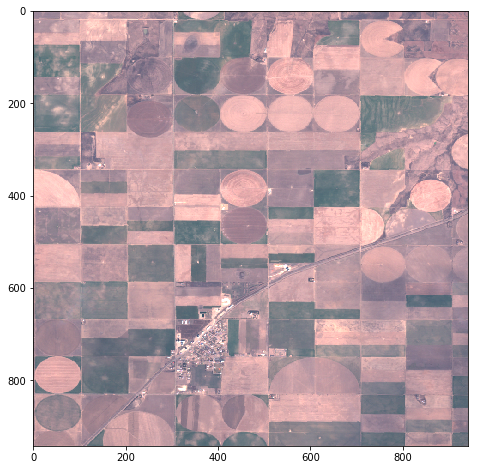

In [18]:
path_target = '/home/jupyter/data/kansas_13bands_cropped_by_min_dim/'
filename = 'tile_2400_9900.npy'

print(path_target + filename.replace('.tif', '.npy'))

cropped = np.load(path_target + filename.replace('.tif', '.npy'))

print('Shape: ', cropped.shape, 'Size: ', round(os.path.getsize(path_target + '/' + filename.replace('.tif', '.npy'))*1e-6), 'MB')

imshow(visualize_all_bands(cropped))

# Show masks

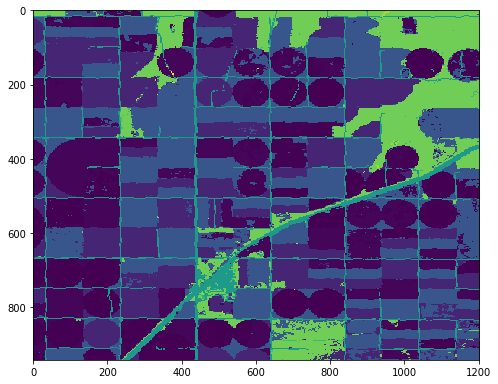

In [9]:
path_target = '/home/jupyter/data/kansas_masks_2016/'
filename = 'tile_2400_9900.tif'

image_orig = Image.open( path_target + filename)

pyplot.imshow(image_orig);

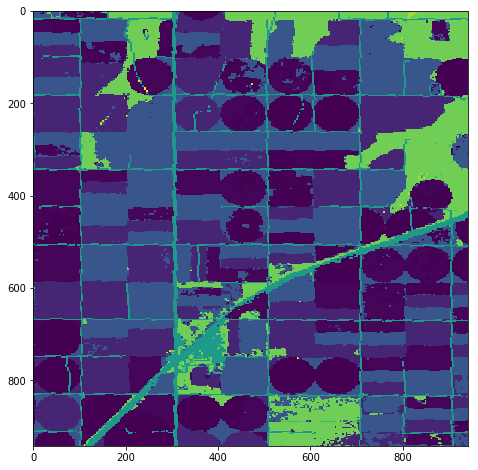

In [10]:
path_target = '/home/jupyter/data/kansas_masks_2016_cropped_by_min_dim/'
filename = 'tile_2400_9900.npy'

mask_cropped = np.load('/home/jupyter/data/kansas_masks_2016_cropped_by_min_dim/' + filename)

pyplot.imshow(mask_cropped, );